## GOAL

**Your goal is to predict the operating condition of a waterpoint for each record in the dataset.The labels are simple. There are three possible values:**
- **functional** - the waterpoint is operational and there are no repairs needed
- **functional needs repair** - the waterpoint is operational, but needs repairs
- **non functional** - the waterpoint is not operational 

**These are all the other variables**

**WATER RELATED**
- **payment**: What the water costs
- **payment_type**: What the water costs
- **water_quality**: The quality of the water
- **quality_group**: The quality of the water
- **quantity**: The quantity of water
- **quantity_group**: The quantity of water
- **source**: The source of the water
- **source_type**: The source of the water
- **source_class**: The source of the water

**WELL/WATERPOINT INFORMATION**
- **amount_tsh**: Total static head (amount water available to waterpoint)
- **waterpoint_type**: The kind of waterpoint
- **waterpoint_type_group**: The kind of waterpoint
- **population**: Population around the well
- **funder**: Who funded the well
- **installer**: Organization that installed the well
- **wpt_name**: Name of the waterpoint if there is one
- **scheme_management**: Who operates the waterpoint
- **scheme_name**: Who operates the waterpoint
- **permit**: If the waterpoint is permitted
- **construction_year**: Year the waterpoint was constructed
- **extraction_type**: The kind of extraction the waterpoint uses
- **extraction_type_group**: The kind of extraction the waterpoint uses
- **extraction_type_class**: The kind of extraction the waterpoint uses
- **management**: How the waterpoint is managed
- **management_group**: How the waterpoint is managed

**GEOGRAPHIC INFORMATION**
- **gps_height**: Altitude of the well
- **longitude**: GPS coordinate
- **latitude**: GPS coordinate
- **basin**: Geographic water basin
- **subvillage**: Geographic location
- **region**: Geographic location
- **region_code**: Geographic location (coded)
- **lga**: Geographic location
- **ward**: Geographic location

**OTHERS**
- **date_recorded**: The date the row was entered
- **num_private**: -
- **public_meeting**: True/False
- **recorded_by**: Group entering this row of data

## INCLUDES


In [308]:
# Importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from fastai.imports import *

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Configuring the visualizations
%matplotlib inline

In [309]:
# Setting a relative path
os.getcwd()

# Importing datasets
data = pd.read_csv("data/training.csv",parse_dates=["date_recorded"])
data_labels = pd.read_csv("data/training_labels.csv")
data = data.merge(data_labels, on="id", how="left")
validation = pd.read_csv("data/validation.csv",parse_dates=["date_recorded"])

## EXPLORATORY DATA ANALYSIS (EDA)

### Let's take a quick look
- We have many variables and many of them are categorical.

In [303]:
# Function for displaying all the columns
def display_all(data):
    with pd.option_context("display.max_rows",1000, "display.max_columns",1000):
        display(data)

In [304]:
display_all(data.tail().transpose())

,59395,59396,59397,59398,59399
id,60739,27263,37057,31282,26348
amount_tsh,10,4700,0,0,0
date_recorded,2013-05-03 00:00:00,2011-05-07 00:00:00,2011-04-11 00:00:00,2011-03-08 00:00:00,2011-03-23 00:00:00
funder,Germany Republi,Cefa-njombe,NaN,Malec,World Bank
gps_height,1210,1212,0,0,191
installer,CES,Cefa,NaN,Musa,World
longitude,37.1698,35.25,34.0171,35.8613,38.104
latitude,-3.25385,-9.07063,-8.75043,-6.37857,-6.74746
wpt_name,Area Three Namba 27,Kwa Yahona Kuvala,Mashine,Mshoro,Kwa Mzee Lugawa
num_private,0,0,0,0,0


In [121]:
data.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


### Initial pre-processing
- We extract particular data fields from the date variable
- Change string variables to categorical variables
- For categorical variables, those values that are strange (less than 30 ocurrences) are converted into "Others"


In [310]:
# Let's extract particular data fields from the date variable
add_datepart(data, 'date_recorded')
data.dtypes

id                                 int64
amount_tsh                       float64
funder                            object
gps_height                         int64
installer                         object
longitude                        float64
latitude                         float64
wpt_name                          object
num_private                        int64
basin                             object
subvillage                        object
region                            object
region_code                        int64
district_code                      int64
lga                               object
ward                              object
population                         int64
public_meeting                    object
recorded_by                       object
scheme_management                 object
scheme_name                       object
permit                            object
construction_year                  int64
extraction_type                   object
extraction_type_

In [312]:
# List variables with type = object
categorical_names = list(data.select_dtypes(include=['object']).columns)
categorical_names

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [313]:
# Replace values with less than 30 ocurrences
for category in categorical_names:
    
    levels_count = data[category].value_counts()
    level_less30= levels_count[levels_count<30]
    rows = data[category].isin(list(level_less30.keys())) 
    data.loc[rows,category] = 'Others'    

In [314]:
# Transform objects into categorical variables
data[categorical_names] = data[categorical_names].astype("category")
data.dtypes

id                                  int64
amount_tsh                        float64
funder                           category
gps_height                          int64
installer                        category
longitude                         float64
latitude                          float64
wpt_name                         category
num_private                         int64
basin                            category
subvillage                       category
region                           category
region_code                         int64
district_code                       int64
lga                              category
ward                             category
population                          int64
public_meeting                   category
recorded_by                      category
scheme_management                category
scheme_name                      category
permit                           category
construction_year                   int64
extraction_type                  c

In [300]:
payment_tab = pd.crosstab(index=data["funder"],  # Make a crosstab
                              columns="count")      # Name the count column
payment_tab

col_0,count
funder,
0,777
Aar,33
Abasia,43
Acra,46
Adb,448
Adra,263
African,128
African Development Bank,35
Aict,85


### Let's explore the dependent variable: status:group
- There is a strong class imbalance 

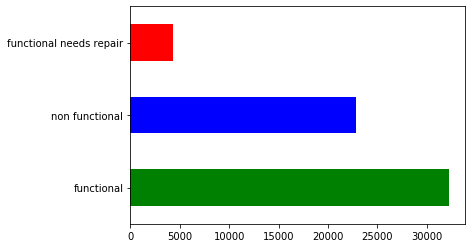

In [315]:
# Let's explore the distribution of the dependent variable. 
my_colors = ['g', 'b', 'r', 'k', 'y', 'm', 'c']  # green, blue, red, black, etc. 
data.status_group.value_counts().plot(kind="barh", color=my_colors)

### Let's explore the water related variables

In [174]:
# Let's check the type of variable
water_variab = ["payment", "payment_type", "water_quality", "quality_group", "quantity", "quantity_group", "source", 
                "source_type", "source_class"]
data[water_variab].dtypes

payment           object
payment_type      object
water_quality     object
quality_group     object
quantity          object
quantity_group    object
source            object
source_type       object
source_class      object
dtype: object

In [175]:
payment_tab = pd.crosstab(index=data["funder"],  # Make a crosstab
                              columns="count")      # Name the count column
payment_tab

col_0,count
funder,
0,777
A/co Germany,15
Aar,33
Abas Ka,1
Abasia,43
Abc-ihushi Development Cent,1
Abd,7
Abdala,1
Abddwe,1


In [163]:
payment_tab = pd.crosstab(index=data["payment_type"],  # Make a crosstab
                              columns="count")      # Name the count column
payment_tab

col_0,count
payment_type,
annually,3642
monthly,8300
never pay,25348
on failure,3914
other,1054
per bucket,8985
unknown,8157


### Initial pre-processing
- We extract particular data fields from the date variable
- Change string variables to categorical variables

In [139]:
# Checking missing values
display_all(data.isnull().sum().sort_index()/len(data))

amount_tsh                       0.000000
basin                            0.000000
construction_year                0.000000
date_recordedDay                 0.000000
date_recordedDayofweek           0.000000
date_recordedDayofyear           0.000000
date_recordedElapsed             0.000000
date_recordedIs_month_end        0.000000
date_recordedIs_month_start      0.000000
date_recordedIs_quarter_end      0.000000
date_recordedIs_quarter_start    0.000000
date_recordedIs_year_end         0.000000
date_recordedIs_year_start       0.000000
date_recordedMonth               0.000000
date_recordedWeek                0.000000
date_recordedYear                0.000000
district_code                    0.000000
extraction_type                  0.000000
extraction_type_class            0.000000
extraction_type_group            0.000000
funder                           0.061195
gps_height                       0.000000
id                               0.000000
installer                        0

In [143]:
# For categorical variables, those values that are strange (less than 30 ocurences) are converted into "Others"
data.funder.value_counts()



Government Of Tanzania          9084
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
Kkkt                            1287
World Vision                    1246
Unicef                          1057
Tasaf                            877
District Council                 843
Dhv                              829
Private Individual               826
Dwsp                             811
0                                777
Norad                            765
Germany Republi                  610
Tcrs                             602
Ministry Of Water                590
Water                            583
Dwe                              484
Netherlands                      470
Hifab                            450
Adb                              448
Lga                              442
Amref                            425
Fini Water                       393
Oxfam                            359
W

In [107]:
# Check the order in ordinal variables
data['water_quality'].unique()

[soft, salty, milky, unknown, fluoride, coloured, salty abandoned, fluoride abandoned]
Categories (8, object): [soft, salty, milky, unknown, fluoride, coloured, salty abandoned, fluoride abandoned]

In [316]:
# Transform categorical variables into numerical variables.
# One-hot encode

dummy_cols = list(set(data.columns) - set("status_group"))
dummy_cols

['date_recordedIs_quarter_start',
 'extraction_type_group',
 'extraction_type',
 'lga',
 'waterpoint_type',
 'date_recordedDay',
 'management_group',
 'date_recordedDayofweek',
 'payment',
 'population',
 'installer',
 'source_type',
 'date_recordedIs_month_end',
 'ward',
 'date_recordedIs_year_start',
 'water_quality',
 'wpt_name',
 'status_group',
 'date_recordedWeek',
 'funder',
 'public_meeting',
 'region_code',
 'date_recordedElapsed',
 'subvillage',
 'recorded_by',
 'construction_year',
 'district_code',
 'num_private',
 'waterpoint_type_group',
 'date_recordedIs_quarter_end',
 'basin',
 'date_recordedYear',
 'source',
 'longitude',
 'scheme_management',
 'management',
 'payment_type',
 'latitude',
 'date_recordedIs_year_end',
 'date_recordedDayofyear',
 'date_recordedMonth',
 'id',
 'extraction_type_class',
 'quality_group',
 'quantity',
 'date_recordedIs_month_start',
 'quantity_group',
 'scheme_name',
 'permit',
 'gps_height',
 'amount_tsh',
 'region',
 'source_class']

In [ ]:
data = pd.get_dummies(data, columns=dummy_cols)

In [110]:
data.shape

(59400, 244728)

In [112]:
# Create a new directory
os.makedirs('tmp', exist_ok=True)

# Save the file
data.to_feather('tmp/data_num')

### Baseline

In [115]:
# Read the dataset
data = pd.read_feather('tmp/data_num')

In [114]:
# Dependend and independent variable
dep_var = data.drop("status_group", axis=1)
indep_var = data["status_group"]

KeyError: "['status_group'] not found in axis"

### Dropping irrelevant variables
Let's check the distributions of the variables. Maybe some of them provide very little information. 

In [2]:
# Let's start with the WATER RELATED variables.
water_variab = ["payment", "payment_type", "water_quality", "quality_group", "quantity", "quantity_group", "source", 
                "source_type", "source_class"]

data[water_variab].head()

,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class
0,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater
1,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface
2,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface
3,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater
4,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface


In [12]:
data[water_variab].dtypes

payment           object
payment_type      object
water_quality     object
quality_group     object
quantity          object
quantity_group    object
source            object
source_type       object
source_class      object
dtype: object

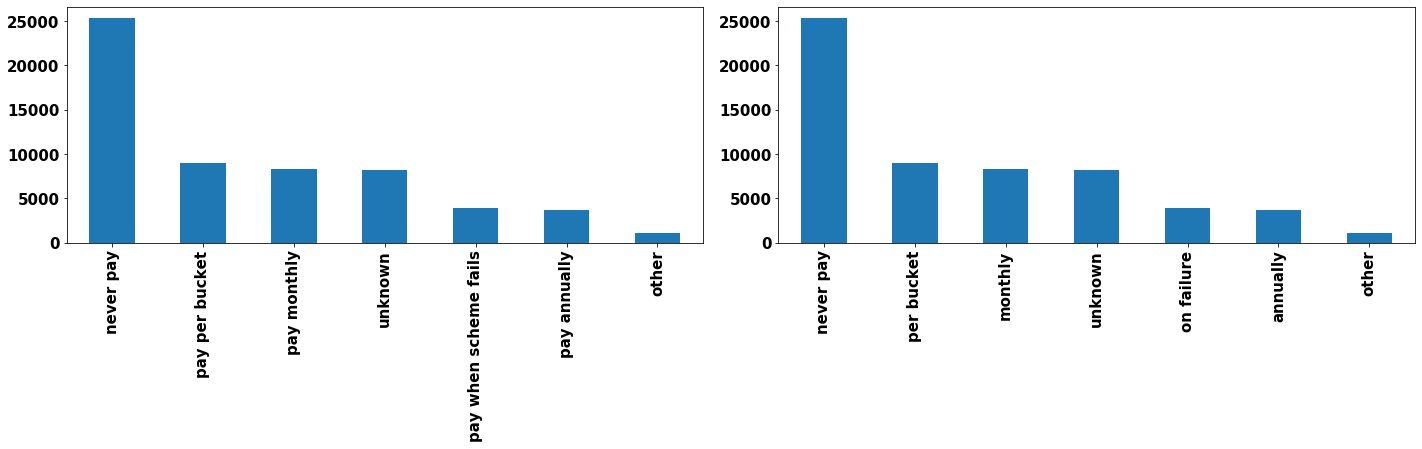

In [81]:
font = {'size': 15}
plt.rc('font', **font)

# Let's plot them
fig, axes = plt.subplots(ncols=2, nrows=1)

# Payment
plt.subplot(221)
data['payment'].value_counts().plot('bar')

# Payment_type
plt.subplot(222)
data['payment_type'].value_counts().plot('bar')

plt.tight_layout()

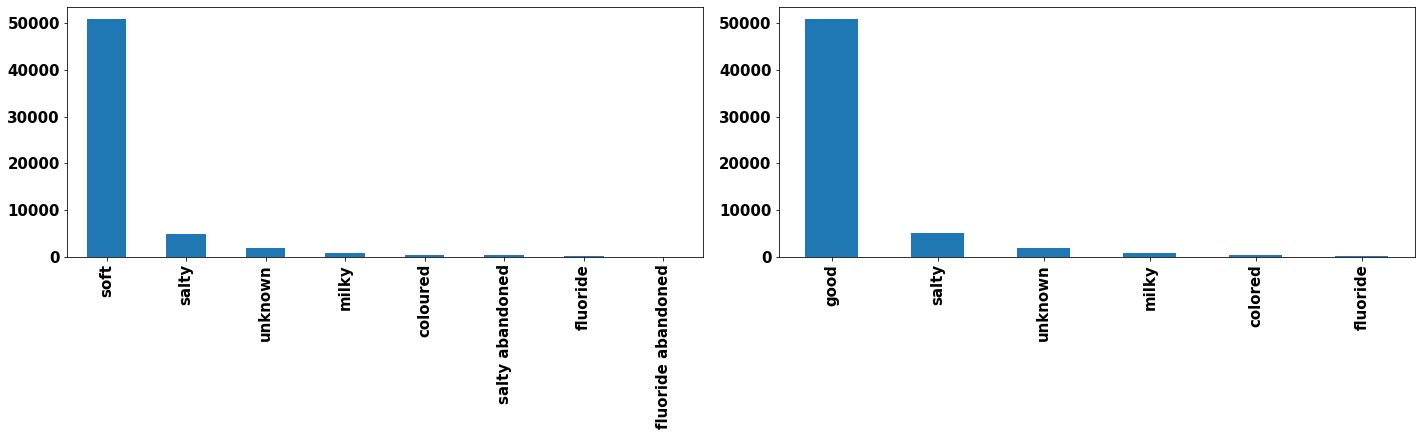

In [78]:
# Let's plot them
fig2, axes = plt.subplots(ncols=2, nrows=1)

# Water_quality)
plt.subplot(221)
data['water_quality'].value_counts().plot('bar')

# Quality group
plt.subplot(222)
data['quality_group'].value_counts().plot('bar')

plt.tight_layout()